# Crawling berita percategory

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

In [ ]:
def scraping_berita(halaman):
    a = 1
    with open('berita_kompas_sports.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Link', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        for page in range(1, halaman + 1):
            url = f'https://indeks.kompas.com/?site=sports&page={page}'
            html = req.get(url).text
            soup = bs(html, 'lxml')
            list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
            berita_list = list_berita.find_all('div', class_='article__list clearfix')

            for berita in berita_list:
                link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text
                category = berita.find('div', class_='article__list__info').find('div', class_='article__subtitle article__subtitle--inline').text

                ge_berita = req.get(link).text
                sop_berita = bs(ge_berita, 'lxml')
                content_elem = sop_berita.find_all('div', class_='read__content')
                content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                a += 1

                writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Link': link, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(17)


data berhasil diambil[1] > Hasil dan 
data berhasil diambil[2] > FC Copenha
data berhasil diambil[3] > Hasil Pers
data berhasil diambil[4] > Victor Osi
data berhasil diambil[5] > Piala Duni
data berhasil diambil[6] > Awal Hebat
data berhasil diambil[7] > Piala Duni
data berhasil diambil[8] > Piala Duni
data berhasil diambil[9] > Hasil Liga
data berhasil diambil[10] > Link Live 
data berhasil diambil[11] > Piala Duni
data berhasil diambil[12] > Liga Champ
data berhasil diambil[13] > Piala Duni
data berhasil diambil[14] > Milan Vs P
data berhasil diambil[15] > PB PSOI Do
data berhasil diambil[16] > Endrick: C
data berhasil diambil[17] > Piala Duni
data berhasil diambil[18] > Dihadiri P
data berhasil diambil[19] > Antusiasme
data berhasil diambil[20] > Piala Duni
data berhasil diambil[21] > Link Live 
data berhasil diambil[22] > SAC Indone
data berhasil diambil[23] > Jadwal Lig
data berhasil diambil[24] > Rencana Ul
data berhasil diambil[25] > Uzbekistan
data berhasil diambil[26] > Totten

In [ ]:
import pandas as pd
sports = pd.read_csv('berita_kompas_sports.csv')
sports

Judul_Artikel        Tanggal Publish  \
0    Hasil dan Klasemen Liga 1: Persib Ditahan Arem...  08/11/2023, 21:24 WIB   
1    FC Copenhagen Vs Man United, Motivasi Tinggi P...  08/11/2023, 21:00 WIB   
2    Hasil Persis Solo Vs PSS Sleman 1-1: Gol Menit...  08/11/2023, 20:57 WIB   
3    Victor Osimhen, Mesin Gol yang Lahir di Piala ...  08/11/2023, 20:15 WIB   
4    Piala Dunia U17 2023: Brasil Vs Iran, Kans Sel...  08/11/2023, 19:30 WIB   
..                                                 ...                    ...   
250  Inter Miami Gagal ke Playoff, Messi Tak Akan K...  12/10/2023, 08:00 WIB   
251  Prediksi Susunan Pemain Timnas Indonesia Vs Br...  12/10/2023, 07:00 WIB   
252  Klasemen Akhir Kualifikasi Piala Asia Futsal 2...  12/10/2023, 05:25 WIB   
253  Legenda Real Madrid: Jude Bellingham Siap Rebu...  11/10/2023, 13:30 WIB   
254  Prakiraan Cuaca MotoGP Mandalika 2023: Cerah, ...  11/10/2023, 13:00 WIB   

                                                  Link  \
0    https://www.kompas.com/sports/read/2023/11/08/...   
1    https://www.kompas.com/sports/read/2023/11/08/...   
2    https://www.kompas.com/sports/read/2023/11/08/...   
3    https://www.kompas.com/sports/read/2023/11/08/...   
4    https://www.kompas.com/sports/read/2023/11/08/...   
..                                                 ...   
250  https://www.kompas.com/sports/read/2023/10/12/...   
251  https://www.kompas.com/sports/read/2023/10/12/...   
252  https://www.kompas.com/sports/read/2023/10/12/...   
253  https://www.kompas.com/sports/read/2023/10/11/...   
254  https://www.kompas.com/sports/read/2023/10/11/...   

                                       Content_Artikel Category  
0    KOMPAS.com - Laju kemenangan Persib Bandung di...   Sports  
1    KOMPAS.com - Pemain belakang FC Copenhagen asa...   Sports  
2    KOMPAS.com - Persis Solo harus puas bermain im...   Sports  
3    KOMPAS.com - Piala Dunia U17 telah melahirkan ...   Sports  
4    KOMPAS.com - Timnas U17 Brasil akan memulai ki...   Sports  
..                                                 ...      ...  
250  KOMPAS.com - Pakar sepak bola Spanyol, Guillem...   Sports  
251  KOMPAS.com - Marselino Ferdinan dan Rafael Str...   Sports  
252  KOMPAS.com - Timnas futsal Indonesia harus men...   Sports  
253  KOMPAS.com - Legenda Real Madrid, Guti, menyeb...   Sports  
254  KOMPAS.com - Cuaca cerah diprediksi bakal mema...   Sports  

[255 rows x 5 columns]

In [ ]:
def scraping_berita(halaman):
    a = 1
    with open('berita_kompas_edukasi.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Link', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        for page in range(1, halaman + 1):
            url = f'https://indeks.kompas.com/?site=edukasi&page={page}'
            html = req.get(url).text
            soup = bs(html, 'lxml')
            list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
            berita_list = list_berita.find_all('div', class_='article__list clearfix')

            for berita in berita_list:
                link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text
                category = "Edukasi"

                ge_berita = req.get(link).text
                sop_berita = bs(ge_berita, 'lxml')
                content_elem = sop_berita.find_all('div', class_='read__content')
                content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                a += 1

                writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Link': link, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(17)


data berhasil diambil[1] > 7 Sekolah 
data berhasil diambil[2] > 14 Kampus 
data berhasil diambil[3] > Bahan Baka
data berhasil diambil[4] > Ada Materi
data berhasil diambil[5] > 10 Perguru
data berhasil diambil[6] > Bunda PAUD
data berhasil diambil[7] > Ini 5 Besa
data berhasil diambil[8] > 5 Kampus B
data berhasil diambil[9] > Pemkot Bli
data berhasil diambil[10] > Beasiswa S
data berhasil diambil[11] > Loloskan 2
data berhasil diambil[12] > Gelar 2 Pr
data berhasil diambil[13] > Mahasiswa 
data berhasil diambil[14] > Ratusan Bu
data berhasil diambil[15] > 8 Kampus y
data berhasil diambil[16] > USK Telah 
data berhasil diambil[17] > Mendikbud 
data berhasil diambil[18] > Pertama di
data berhasil diambil[19] > "Edufair 2
data berhasil diambil[20] > Iriana Jok
data berhasil diambil[21] > Cerita Rik
data berhasil diambil[22] > Beasiswa P
data berhasil diambil[23] > Ini Peran 
data berhasil diambil[24] > Apakah IPK
data berhasil diambil[25] > UNS Raih P
data berhasil diambil[26] > 3 Juru

In [ ]:
edukasi = pd.read_csv('berita_kompas_edukasi.csv')
edukasi

Judul_Artikel        Tanggal Publish  \
0    7 Sekolah Pilot yang Ada di Indonesia Beserta ...  08/11/2023, 20:36 WIB   
1    14 Kampus Swasta Terbaik di Indonesia Versi QS...  08/11/2023, 20:15 WIB   
2    Bahan Bakar Nabati Bisa Tangkal Pemanasan Glob...  08/11/2023, 20:10 WIB   
3    Ada Materi AI dalam Program Bangkit 2024, Sege...  08/11/2023, 19:50 WIB   
4    10 Perguruan Tinggi Terbaik di Indonesia Versi...  08/11/2023, 19:26 WIB   
..                                                 ...                    ...   
250          5 Ciri Teman "Toxic" di Dunia Perkuliahan  30/10/2023, 08:37 WIB   
251  5 Beasiswa Luar Negeri dengan Syarat Pengalama...  30/10/2023, 08:06 WIB   
252  6 Perbedaan Kuliah di Inggris dan Amerika, dar...  30/10/2023, 08:00 WIB   
253  Mahasiswa Butuh Literasi Keuangan agar Tidak T...  30/10/2023, 07:59 WIB   
254  Seminar BEM Undhira, Akademisi CH dan Ukrida: ...  30/10/2023, 07:53 WIB   

                                                  Link  \
0    https://www.kompas.com/edu/read/2023/11/08/203...   
1    https://www.kompas.com/edu/read/2023/11/08/201...   
2    https://www.kompas.com/edu/read/2023/11/08/201...   
3    https://www.kompas.com/edu/read/2023/11/08/195...   
4    https://www.kompas.com/edu/read/2023/11/08/192...   
..                                                 ...   
250  https://edukasi.kompas.com/read/2023/10/30/083...   
251  https://www.kompas.com/edu/read/2023/10/30/080...   
252  https://edukasi.kompas.com/read/2023/10/30/080...   
253  https://www.kompas.com/edu/read/2023/10/30/075...   
254  https://www.kompas.com/edu/read/2023/10/30/075...   

                                       Content_Artikel Category  
0    KOMPAS.com - Pilot merupakan profesi yang bert...  Edukasi  
1    KOMPAS.com - Lembaga pemeringkatan Quacquarell...  Edukasi  
2    KOMPAS.com - Beberapa hari yang lalu, Kontes M...  Edukasi  
3    KOMPAS.com - Ada materi Artificial Intelligenc...  Edukasi  
4    KOMPAS.com - Lembaga pemeringkatan Quacquarell...  Edukasi  
..                                                 ...      ...  
250  KOMPAS.com - Ada beberapa teman kampus yang ja...  Edukasi  
251  KOMPAS.com - Berkuliah di luar negeri merupaka...  Edukasi  
252  KOMPAS.com - Inggris dan Amerika Serikat adala...  Edukasi  
253  KOMPAS.com - Mahasiswa membutuhkan literasi ke...  Edukasi  
254  KOMPAS.com - Badan Eksekutif Mahasiswa (BEM) F...  Edukasi  

[255 rows x 5 columns]

In [ ]:
def scraping_berita(halaman):
    a = 1
    with open('berita_kompas_otomotif.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Tanggal Publish', 'Link', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        for page in range(1, halaman + 1):
            url = f'https://indeks.kompas.com/?site=otomotif&page={page}'
            html = req.get(url).text
            soup = bs(html, 'lxml')
            list_berita = soup.find('div', class_='latest--indeks mt2 clearfix')
            berita_list = list_berita.find_all('div', class_='article__list clearfix')

            for berita in berita_list:
                link = berita.find('div', class_='article__list__title').find('a', class_='article__link')['href']
                date = berita.find('div', class_='article__list__info').find('div', class_='article__date').text
                headline = berita.find('div', class_='article__list__title').find('a', class_='article__link').text
                category = "Otomotif"

                ge_berita = req.get(link).text
                sop_berita = bs(ge_berita, 'lxml')
                content_elem = sop_berita.find_all('div', class_='read__content')
                content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                a += 1

                writer.writerow({'Judul_Artikel': headline, 'Tanggal Publish': date, 'Link': link, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(17)


data berhasil diambil[1] > Pemerintah
data berhasil diambil[2] > Mazda Nuru
data berhasil diambil[3] > Produsen K
data berhasil diambil[4] > Drag Race 
data berhasil diambil[5] > Bawa MG4 E
data berhasil diambil[6] > Yamaha Lun
data berhasil diambil[7] > Pajak Kend
data berhasil diambil[8] > Tips Saat 
data berhasil diambil[9] > Perjuangan
data berhasil diambil[10] > Gantikan C
data berhasil diambil[11] > Toyota Mir
data berhasil diambil[12] > Video Mobi
data berhasil diambil[13] > Hino Resmi
data berhasil diambil[14] > PO Arimbi 
data berhasil diambil[15] > Berapa Gaj
data berhasil diambil[16] > Pentingnya
data berhasil diambil[17] > Kendaraan 
data berhasil diambil[18] > Manjakan K
data berhasil diambil[19] > Hyundai Se
data berhasil diambil[20] > Modifikasi
data berhasil diambil[21] > Ini Mobil 
data berhasil diambil[22] > Kawasaki Z
data berhasil diambil[23] > Alasan Hon
data berhasil diambil[24] > Menerka Mo
data berhasil diambil[25] > Tantangan 
data berhasil diambil[26] > Cara M

In [ ]:
import pandas as pd
oto = pd.read_csv('berita_kompas_otomotif.csv')
oto

Judul_Artikel        Tanggal Publish  \
0    Pemerintah Yakin Kendaraan Listrik Bakal Laris...  08/11/2023, 19:31 WIB   
1    Mazda Nurut dengan Pemerintah, Siapkan Mobil L...  08/11/2023, 19:21 WIB   
2    Produsen Kendaraan Harus Ikut Andil dalam Hal ...  08/11/2023, 19:12 WIB   
3    Drag Race Harley Davidson di Indonesia Harus B...  08/11/2023, 19:11 WIB   
4       Bawa MG4 EV buat Dipakai Harian, Ini Ulasannya  08/11/2023, 19:01 WIB   
..                                                 ...                    ...   
250  Hankook Luncurkan 3 Ban, Termasuk buat Mobil L...  03/11/2023, 18:01 WIB   
251  Bus AKAP PO Agra Mas Trayek Parung-Yogya, Ada ...  03/11/2023, 17:51 WIB   
252  Toyota Crown Meluncur, Pakai Mesin Ramah Lingk...  03/11/2023, 17:41 WIB   
253  Bahayanya Pakai Ban Motor Vulkanisir, Mudah Lepas  03/11/2023, 17:31 WIB   
254  Modifikasi Lexus GX Bergaya Offroad, Tampil Ga...  03/11/2023, 17:21 WIB   

                                                  Link  \
0    https://otomotif.kompas.com/read/2023/11/08/19...   
1    https://otomotif.kompas.com/read/2023/11/08/19...   
2    https://otomotif.kompas.com/read/2023/11/08/19...   
3    https://otomotif.kompas.com/read/2023/11/08/19...   
4    https://otomotif.kompas.com/read/2023/11/08/19...   
..                                                 ...   
250  https://otomotif.kompas.com/read/2023/11/03/18...   
251  https://otomotif.kompas.com/read/2023/11/03/17...   
252  https://otomotif.kompas.com/read/2023/11/03/17...   
253  https://otomotif.kompas.com/read/2023/11/03/17...   
254  https://otomotif.kompas.com/read/2023/11/03/17...   

                                       Content_Artikel  Category  
0    JAKARTA, KOMPAS.com - Pemerintah RI meyakini b...  Otomotif  
1    BOGOR, KOMPAS.com - Indonesia punya target net...  Otomotif  
2    JAKARTA, KOMPAS.com - Aturan razia uji emisi y...  Otomotif  
3    JAKARTA, KOMPAS.com - Ketua Umum Ikatan Motor ...  Otomotif  
4    JAKARTA, KOMPAS.com - MG4 EV hadir dengan tamp...  Otomotif  
..                                                 ...       ...  
250  JAKARTA, KOMPAS.com - Hankook Tire meluncurkan...  Otomotif  
251  JAKARTA, KOMPAS.com - Perusahaan otobus (PO) A...  Otomotif  
252  JAKARTA, KOMPAS.com - Toyota Motor Corporation...  Otomotif  
253  JAKARTA, KOMPAS.com - Ban adalah komponen pent...  Otomotif  
254  JAKARTA, KOMPAS.com - Lexus GX generasi ketiga...  Otomotif  

[255 rows x 5 columns]

# Preprocessing

In [48]:
import pandas as pd
path = '/content/drive/MyDrive/ppw/tugas ppw/dataset/data_berita_scraping_kompas_category.csv'
data = pd.read_csv(path, delimiter=';')
data

Judul_Artikel        Tanggal Publish  \
0    Pemerintah Yakin Kendaraan Listrik Bakal Laris...  08/11/2023, 19:31 WIB   
1    Mazda Nurut dengan Pemerintah, Siapkan Mobil L...  08/11/2023, 19:21 WIB   
2    Produsen Kendaraan Harus Ikut Andil dalam Hal ...  08/11/2023, 19:12 WIB   
3    Drag Race Harley Davidson di Indonesia Harus B...  08/11/2023, 19:11 WIB   
4       Bawa MG4 EV buat Dipakai Harian, Ini Ulasannya  08/11/2023, 19:01 WIB   
..                                                 ...                    ...   
760  Inter Miami Gagal ke Playoff, Messi Tak Akan K...  12/10/2023, 08:00 WIB   
761  Prediksi Susunan Pemain Timnas Indonesia Vs Br...  12/10/2023, 07:00 WIB   
762  Klasemen Akhir Kualifikasi Piala Asia Futsal 2...  12/10/2023, 05:25 WIB   
763  Legenda Real Madrid: Jude Bellingham Siap Rebu...  11/10/2023, 13:30 WIB   
764  Prakiraan Cuaca MotoGP Mandalika 2023: Cerah, ...  11/10/2023, 13:00 WIB   

                                                  Link  \
0    https://otomotif.kompas.com/read/2023/11/08/19...   
1    https://otomotif.kompas.com/read/2023/11/08/19...   
2    https://otomotif.kompas.com/read/2023/11/08/19...   
3    https://otomotif.kompas.com/read/2023/11/08/19...   
4    https://otomotif.kompas.com/read/2023/11/08/19...   
..                                                 ...   
760  https://www.kompas.com/sports/read/2023/10/12/...   
761  https://www.kompas.com/sports/read/2023/10/12/...   
762  https://www.kompas.com/sports/read/2023/10/12/...   
763  https://www.kompas.com/sports/read/2023/10/11/...   
764  https://www.kompas.com/sports/read/2023/10/11/...   

                                       Content_Artikel  Category  
0    JAKARTA, KOMPAS.com - Pemerintah RI meyakini b...  Otomotif  
1    BOGOR, KOMPAS.com - Indonesia punya target net...  Otomotif  
2    JAKARTA, KOMPAS.com - Aturan razia uji emisi y...  Otomotif  
3    JAKARTA, KOMPAS.com - Ketua Umum Ikatan Motor ...  Otomotif  
4    JAKARTA, KOMPAS.com - MG4 EV hadir dengan tamp...  Otomotif  
..                                                 ...       ...  
760  KOMPAS.com - Pakar sepak bola Spanyol, Guillem...    Sports  
761  KOMPAS.com - Marselino Ferdinan dan Rafael Str...    Sports  
762  KOMPAS.com - Timnas futsal Indonesia harus men...    Sports  
763  KOMPAS.com - Legenda Real Madrid, Guti, menyeb...    Sports  
764  KOMPAS.com - Cuaca cerah diprediksi bakal mema...    Sports  

[765 rows x 5 columns]

In [49]:
# Hitung jumlah kelas
kelas = data['Category'].value_counts()
kelas

Otomotif    255
Edukasi     255
Sports      255
Name: Category, dtype: int64

In [50]:
data.isnull().sum()

Judul_Artikel      0
Tanggal Publish    0
Link               0
Content_Artikel    0
Category           0
dtype: int64

In [51]:
data.duplicated().sum()

0

### Clean data

In [9]:
import re
data['clean_content'] = data['Content_Artikel'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
data

Judul_Artikel        Tanggal Publish  \
0    Pemerintah Yakin Kendaraan Listrik Bakal Laris...  08/11/2023, 19:31 WIB   
1    Mazda Nurut dengan Pemerintah, Siapkan Mobil L...  08/11/2023, 19:21 WIB   
2    Produsen Kendaraan Harus Ikut Andil dalam Hal ...  08/11/2023, 19:12 WIB   
3    Drag Race Harley Davidson di Indonesia Harus B...  08/11/2023, 19:11 WIB   
4       Bawa MG4 EV buat Dipakai Harian, Ini Ulasannya  08/11/2023, 19:01 WIB   
..                                                 ...                    ...   
760  Inter Miami Gagal ke Playoff, Messi Tak Akan K...  12/10/2023, 08:00 WIB   
761  Prediksi Susunan Pemain Timnas Indonesia Vs Br...  12/10/2023, 07:00 WIB   
762  Klasemen Akhir Kualifikasi Piala Asia Futsal 2...  12/10/2023, 05:25 WIB   
763  Legenda Real Madrid: Jude Bellingham Siap Rebu...  11/10/2023, 13:30 WIB   
764  Prakiraan Cuaca MotoGP Mandalika 2023: Cerah, ...  11/10/2023, 13:00 WIB   

                                                  Link  \
0    https://otomotif.kompas.com/read/2023/11/08/19...   
1    https://otomotif.kompas.com/read/2023/11/08/19...   
2    https://otomotif.kompas.com/read/2023/11/08/19...   
3    https://otomotif.kompas.com/read/2023/11/08/19...   
4    https://otomotif.kompas.com/read/2023/11/08/19...   
..                                                 ...   
760  https://www.kompas.com/sports/read/2023/10/12/...   
761  https://www.kompas.com/sports/read/2023/10/12/...   
762  https://www.kompas.com/sports/read/2023/10/12/...   
763  https://www.kompas.com/sports/read/2023/10/11/...   
764  https://www.kompas.com/sports/read/2023/10/11/...   

                                       Content_Artikel  Category  \
0    JAKARTA, KOMPAS.com - Pemerintah RI meyakini b...  Otomotif   
1    BOGOR, KOMPAS.com - Indonesia punya target net...  Otomotif   
2    JAKARTA, KOMPAS.com - Aturan razia uji emisi y...  Otomotif   
3    JAKARTA, KOMPAS.com - Ketua Umum Ikatan Motor ...  Otomotif   
4    JAKARTA, KOMPAS.com - MG4 EV hadir dengan tamp...  Otomotif   
..                                                 ...       ...   
760  KOMPAS.com - Pakar sepak bola Spanyol, Guillem...    Sports   
761  KOMPAS.com - Marselino Ferdinan dan Rafael Str...    Sports   
762  KOMPAS.com - Timnas futsal Indonesia harus men...    Sports   
763  KOMPAS.com - Legenda Real Madrid, Guti, menyeb...    Sports   
764  KOMPAS.com - Cuaca cerah diprediksi bakal mema...    Sports   

                                         clean_content  
0    jakarta, kompas.com  pemerintah ri meyakini ba...  
1    bogor, kompas.com  indonesia punya target net ...  
2    jakarta, kompas.com  aturan razia uji emisi ya...  
3    jakarta, kompas.com  ketua umum ikatan motor i...  
4    jakarta, kompas.com  mg4 ev hadir dengan tampi...  
..                                                 ...  
760  kompas.com  pakar sepak bola spanyol, guillem ...  
761  kompas.com  marselino ferdinan dan rafael stru...  
762  kompas.com  timnas futsal indonesia harus meng...  
763  kompas.com  legenda real madrid, guti, menyebu...  
764  kompas.com  cuaca cerah diprediksi bakal memay...  

[765 rows x 6 columns]

### Tokenizing

In [10]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
data["tokenizing"] = data['clean_content'].apply(sent_tokenize)
data

Judul_Artikel        Tanggal Publish  \
0    Pemerintah Yakin Kendaraan Listrik Bakal Laris...  08/11/2023, 19:31 WIB   
1    Mazda Nurut dengan Pemerintah, Siapkan Mobil L...  08/11/2023, 19:21 WIB   
2    Produsen Kendaraan Harus Ikut Andil dalam Hal ...  08/11/2023, 19:12 WIB   
3    Drag Race Harley Davidson di Indonesia Harus B...  08/11/2023, 19:11 WIB   
4       Bawa MG4 EV buat Dipakai Harian, Ini Ulasannya  08/11/2023, 19:01 WIB   
..                                                 ...                    ...   
760  Inter Miami Gagal ke Playoff, Messi Tak Akan K...  12/10/2023, 08:00 WIB   
761  Prediksi Susunan Pemain Timnas Indonesia Vs Br...  12/10/2023, 07:00 WIB   
762  Klasemen Akhir Kualifikasi Piala Asia Futsal 2...  12/10/2023, 05:25 WIB   
763  Legenda Real Madrid: Jude Bellingham Siap Rebu...  11/10/2023, 13:30 WIB   
764  Prakiraan Cuaca MotoGP Mandalika 2023: Cerah, ...  11/10/2023, 13:00 WIB   

                                                  Link  \
0    https://otomotif.kompas.com/read/2023/11/08/19...   
1    https://otomotif.kompas.com/read/2023/11/08/19...   
2    https://otomotif.kompas.com/read/2023/11/08/19...   
3    https://otomotif.kompas.com/read/2023/11/08/19...   
4    https://otomotif.kompas.com/read/2023/11/08/19...   
..                                                 ...   
760  https://www.kompas.com/sports/read/2023/10/12/...   
761  https://www.kompas.com/sports/read/2023/10/12/...   
762  https://www.kompas.com/sports/read/2023/10/12/...   
763  https://www.kompas.com/sports/read/2023/10/11/...   
764  https://www.kompas.com/sports/read/2023/10/11/...   

                                       Content_Artikel  Category  \
0    JAKARTA, KOMPAS.com - Pemerintah RI meyakini b...  Otomotif   
1    BOGOR, KOMPAS.com - Indonesia punya target net...  Otomotif   
2    JAKARTA, KOMPAS.com - Aturan razia uji emisi y...  Otomotif   
3    JAKARTA, KOMPAS.com - Ketua Umum Ikatan Motor ...  Otomotif   
4    JAKARTA, KOMPAS.com - MG4 EV hadir dengan tamp...  Otomotif   
..                                                 ...       ...   
760  KOMPAS.com - Pakar sepak bola Spanyol, Guillem...    Sports   
761  KOMPAS.com - Marselino Ferdinan dan Rafael Str...    Sports   
762  KOMPAS.com - Timnas futsal Indonesia harus men...    Sports   
763  KOMPAS.com - Legenda Real Madrid, Guti, menyeb...    Sports   
764  KOMPAS.com - Cuaca cerah diprediksi bakal mema...    Sports   

                                         clean_content  \
0    jakarta, kompas.com  pemerintah ri meyakini ba...   
1    bogor, kompas.com  indonesia punya target net ...   
2    jakarta, kompas.com  aturan razia uji emisi ya...   
3    jakarta, kompas.com  ketua umum ikatan motor i...   
4    jakarta, kompas.com  mg4 ev hadir dengan tampi...   
..                                                 ...   
760  kompas.com  pakar sepak bola spanyol, guillem ...   
761  kompas.com  marselino ferdinan dan rafael stru...   
762  kompas.com  timnas futsal indonesia harus meng...   
763  kompas.com  legenda real madrid, guti, menyebu...   
764  kompas.com  cuaca cerah diprediksi bakal memay...   

                                            tokenizing  
0    [jakarta, kompas.com  pemerintah ri meyakini b...  
1    [bogor, kompas.com  indonesia punya target net...  
2    [jakarta, kompas.com  aturan razia uji emisi y...  
3    [jakarta, kompas.com  ketua umum ikatan motor ...  
4    [jakarta, kompas.com  mg4 ev hadir dengan tamp...  
..                                                 ...  
760  [kompas.com  pakar sepak bola spanyol, guillem...  
761  [kompas.com  marselino ferdinan dan rafael str...  
762  [kompas.com  timnas futsal indonesia harus men...  
763  [kompas.com  legenda real madrid, guti, menyeb...  
764  [kompas.com  cuaca cerah diprediksi bakal mema...  

[765 rows x 7 columns]

### TF IDF

In [13]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf_results = []
set_len_doc = data['tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results

In [15]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

========== Document ke-0 ==========
Hasil Tfidf Kalimat ke-1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1702146593223555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22502254440444064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2570831019212949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2570831019212949, 0.1702146593223555, 0.0, 0.0, 0.0, 0.22502254440444064, 0.0, 0.1702146593223555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2570831019212949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2022752168392098, 0.0, 0.0, 0.2570831019212949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15802580105062083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2570831019212949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22502254440444064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2022752168392098, 0.0, 0.0, 0.0, 0.0, 0.2022752168392098, 0.0, 0.0, 0.0, 0.2570831019212949, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22502254440444064, 0.0, 0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Cosine Similarity
Merupakan metode untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Biasanya, cosine similarity digunakan dalam pemrosesan bahasa alami dan pengelompokan dokumen untuk menentukan seberapa serupa atau berbeda dua dokumen berdasarkan representasi vektor mereka.

In [16]:
# Import Library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [17]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [18]:
# menampilkan hasil cosine simmilarity
for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity Kalimat 1 : 4 = 0.16169600758005864
Cosine Similarity Kalimat 1 : 5 = 0.18492567426844897
Cosine Similarity Kalimat 1 : 6 = 0.17730748126103588
Cosine Similarity Kalimat 1 : 7 = 0.1973494758325219
Cosine Similarity Kalimat 1 : 8 = 0.11087938172794987
Cosine Similarity Kalimat 2 : 3 = 0.14326773663539716
Cosine Similarity Kalimat 2 : 4 = 0.20451408733134036
Cosine Similarity Kalimat 3 : 4 = 0.15491519237583198
Cosine Similarity Kalimat 3 : 5 = 0.15596339286947333
Cosine Similarity Kalimat 3 : 6 = 0.2700310580649914
Cosine Similarity Kalimat 3 : 7 = 0.3958171397559581
Cosine Similarity Kalimat 4 : 5 = 0.16351246697157984
Cosine Similarity Kalimat 4 : 6 = 0.10944570306023979
Cosine Similarity Kalimat 5 : 6 = 0.3280348088963792
Cosine Similarity Kalimat 5 : 7 = 0.1266952213996965
Cosine Similarity Kalimat 6 : 7 = 0.26720343126033325
Cosine Similarity Kalimat 7 : 8 = 0.09422248639890114


============= Document ke 

### Closenens Centrality
Merupakan salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.

In [19]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 2: 0.058823529411764705,
 4: 0.17647058823529413,
 6: 0.1568627450980392,
 9: 0.16339869281045752,
 10: 0.3176470588235294,
 16: 0.4117647058823529,
 1: 0.0,
 5: 0.1568627450980392,
 7: 0.2450980392156863,
 8: 0.28823529411764703,
 11: 0.36764705882352944,
 14: 0.4970588235294118,
 15: 0.5012787723785166,
 3: 0.0,
 12: 0.32679738562091504,
 13: 0.4235294117647059,
 17: 0.5019607843137255}

In [20]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

Output streaming akan dipotong hingga 5000 baris terakhir.
Closenes Centrality Node 3 = 0.15384615384615385
Closenes Centrality Node 4 = 0.24615384615384617
Closenes Centrality Node 5 = 0.38461538461538464
Closenes Centrality Node 6 = 0.3076923076923077
Closenes Centrality Node 9 = 0.4475524475524476
Closenes Centrality Node 10 = 0.15384615384615385
Closenes Centrality Node 12 = 0.4524886877828055
Closenes Centrality Node 11 = 0.49230769230769234
Closenes Centrality Node 7 = 0.27692307692307694
Closenes Centrality Node 8 = 0.0
Closenes Centrality Node 13 = 0.38196286472148544


========= document ke-398 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.25
Closenes Centrality Node 4 = 0.28125
Closenes Centrality Node 7 = 0.75
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 3 = 0.28125
Closenes Centrality Node 5 = 0.3333333333333333
Closenes Centrality Node 8 = 0.5104166666666667
Closenes Centrality Node 6 = 0.28409090909090906


========= document

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.058823529411764705
Closenes Centrality Node 4 = 0.17647058823529413
Closenes Centrality Node 6 = 0.1568627450980392
Closenes Centrality Node 9 = 0.16339869281045752
Closenes Centrality Node 10 = 0.3176470588235294
Closenes Centrality Node 16 = 0.4117647058823529
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 5 = 0.1568627450980392
Closenes Centrality Node 7 = 0.2450980392156863
Closenes Centrality Node 8 = 0.28823529411764703
Closenes Centrality Node 11 = 0.36764705882352944
Closenes Centrality Node 14 = 0.4970588235294118
Closenes Centrality Node 15 = 0.5012787723785166
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 12 = 0.32679738562091504
Closenes Centrality Node 13 = 0.4235294117647059
Closenes Centrality Node 17 = 0.5019607843137255


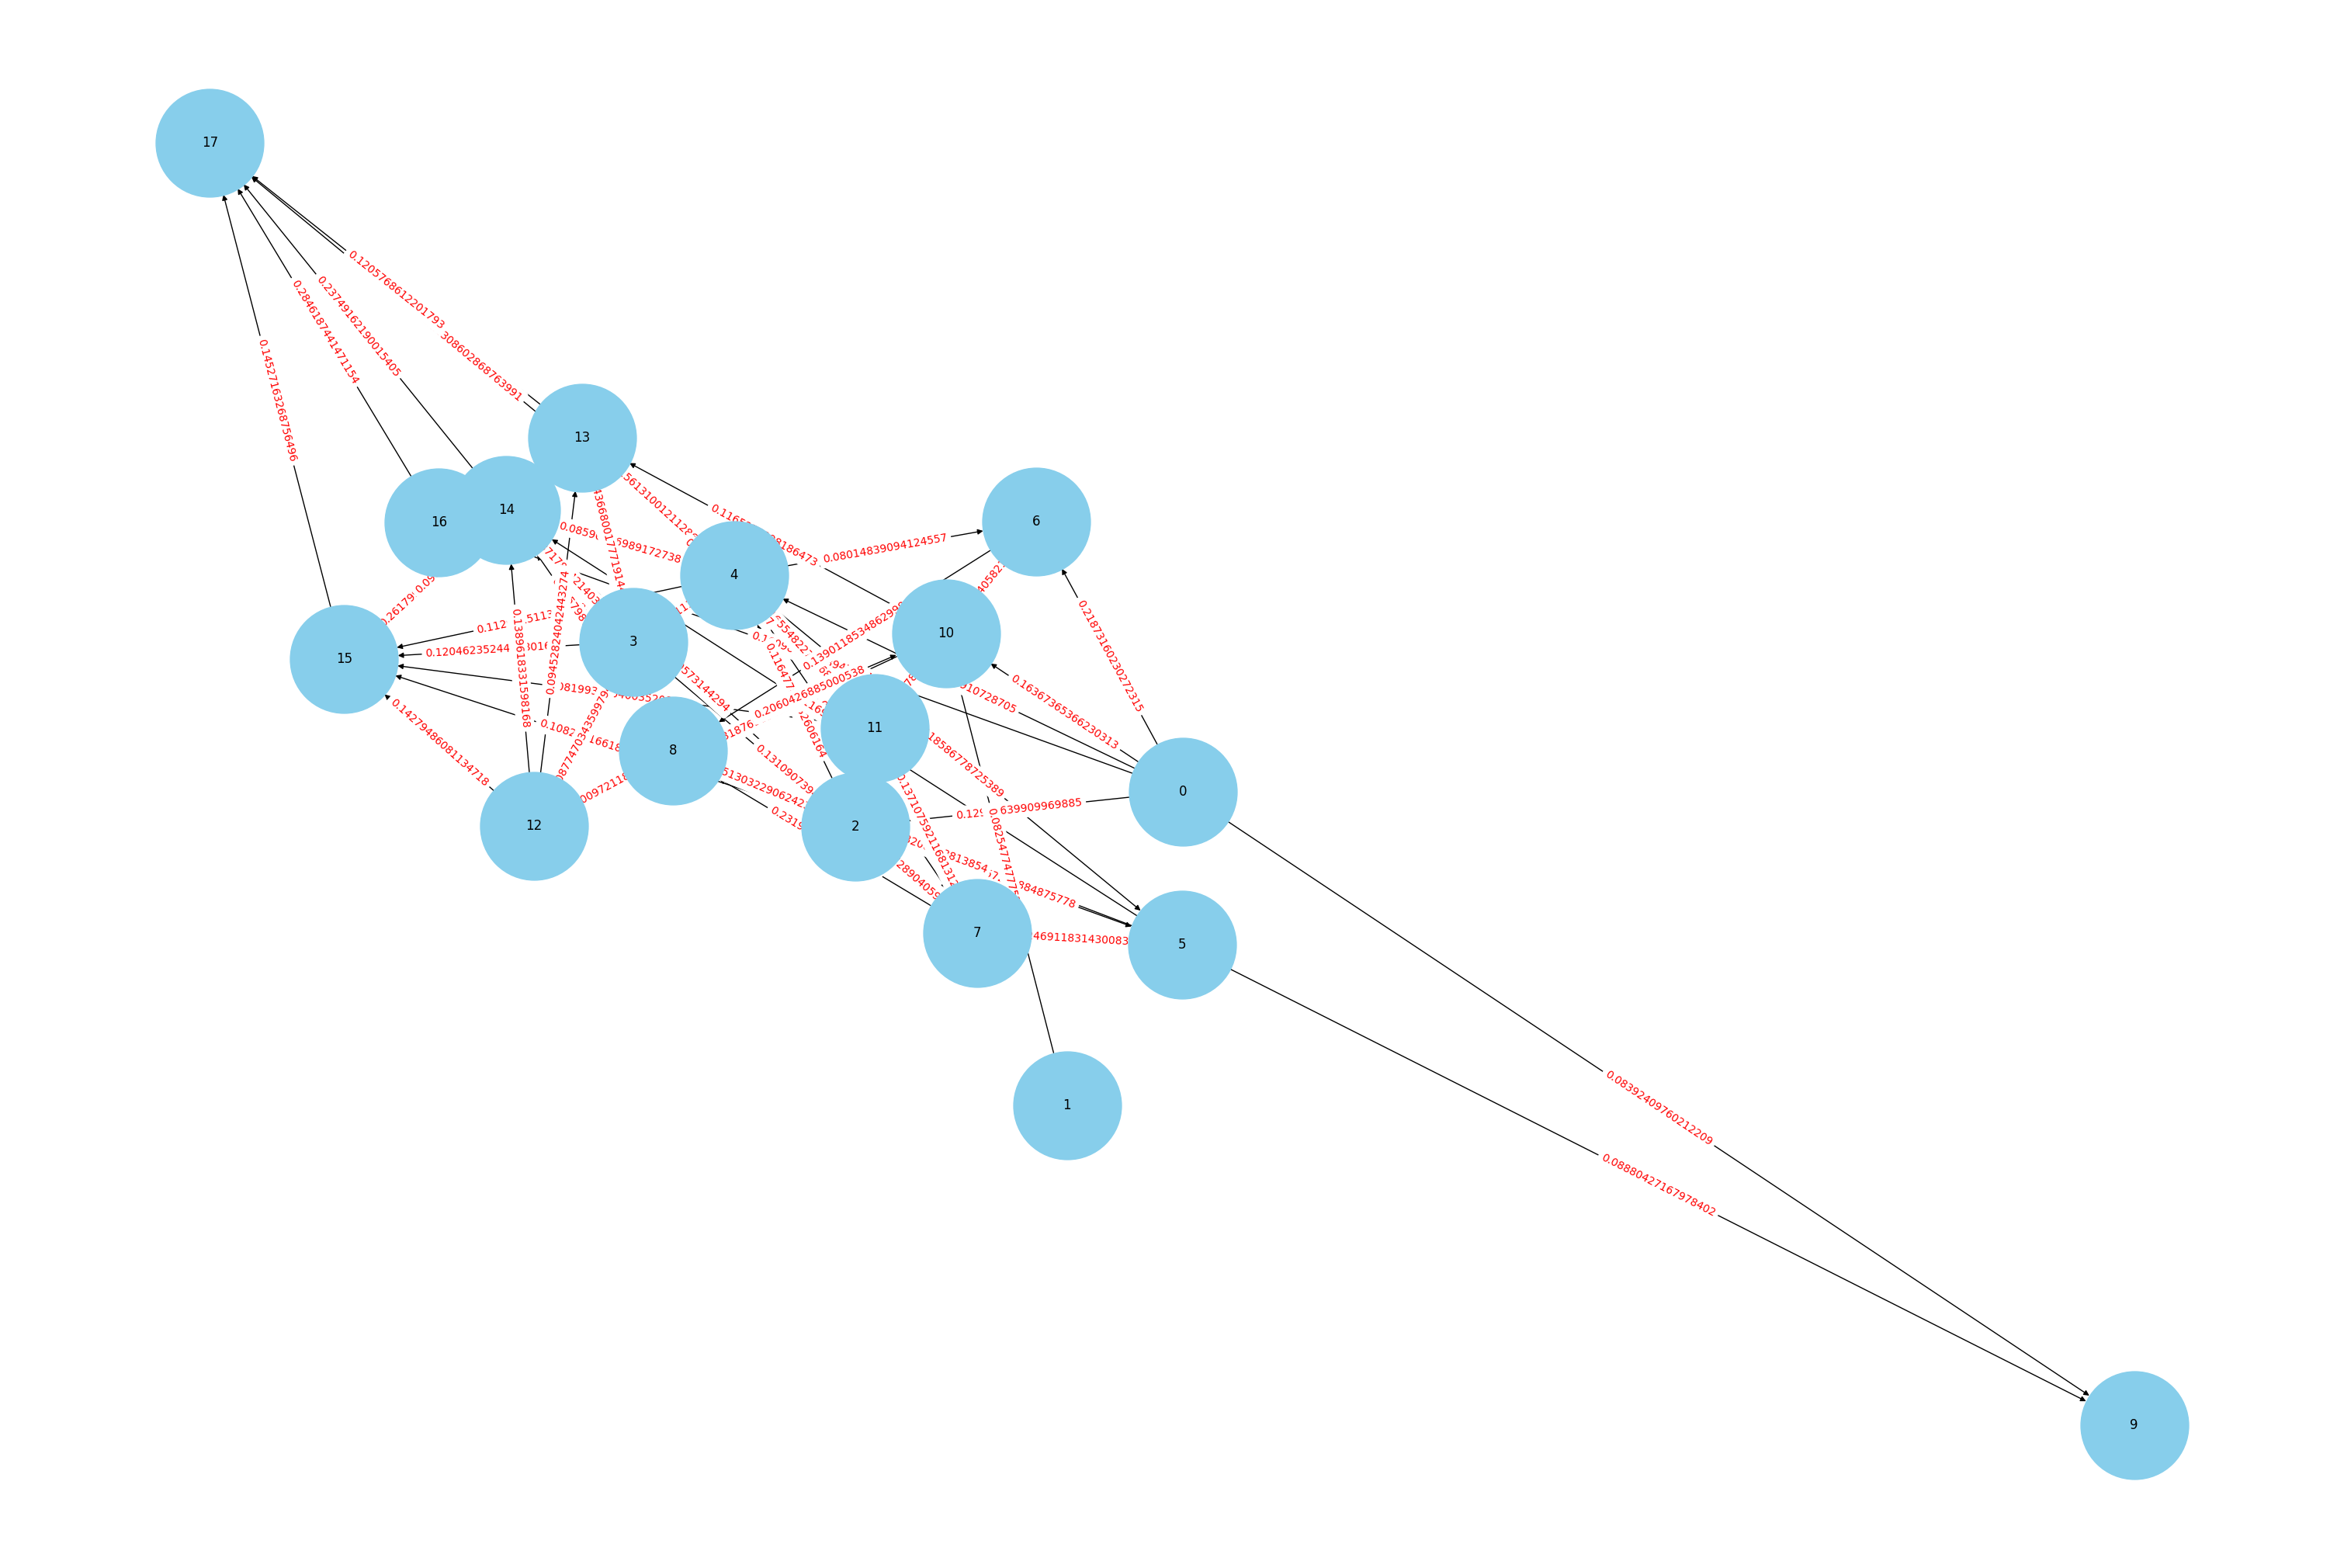



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.2
Closenes Centrality Node 5 = 0.4166666666666667
Closenes Centrality Node 9 = 0.6124999999999999
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 4 = 0.22499999999999998
Closenes Centrality Node 7 = 0.39999999999999997
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 6 = 0.3272727272727272
Closenes Centrality Node 10 = 0.28823529411764703
Closenes Centrality Node 8 = 0.37692307692307686


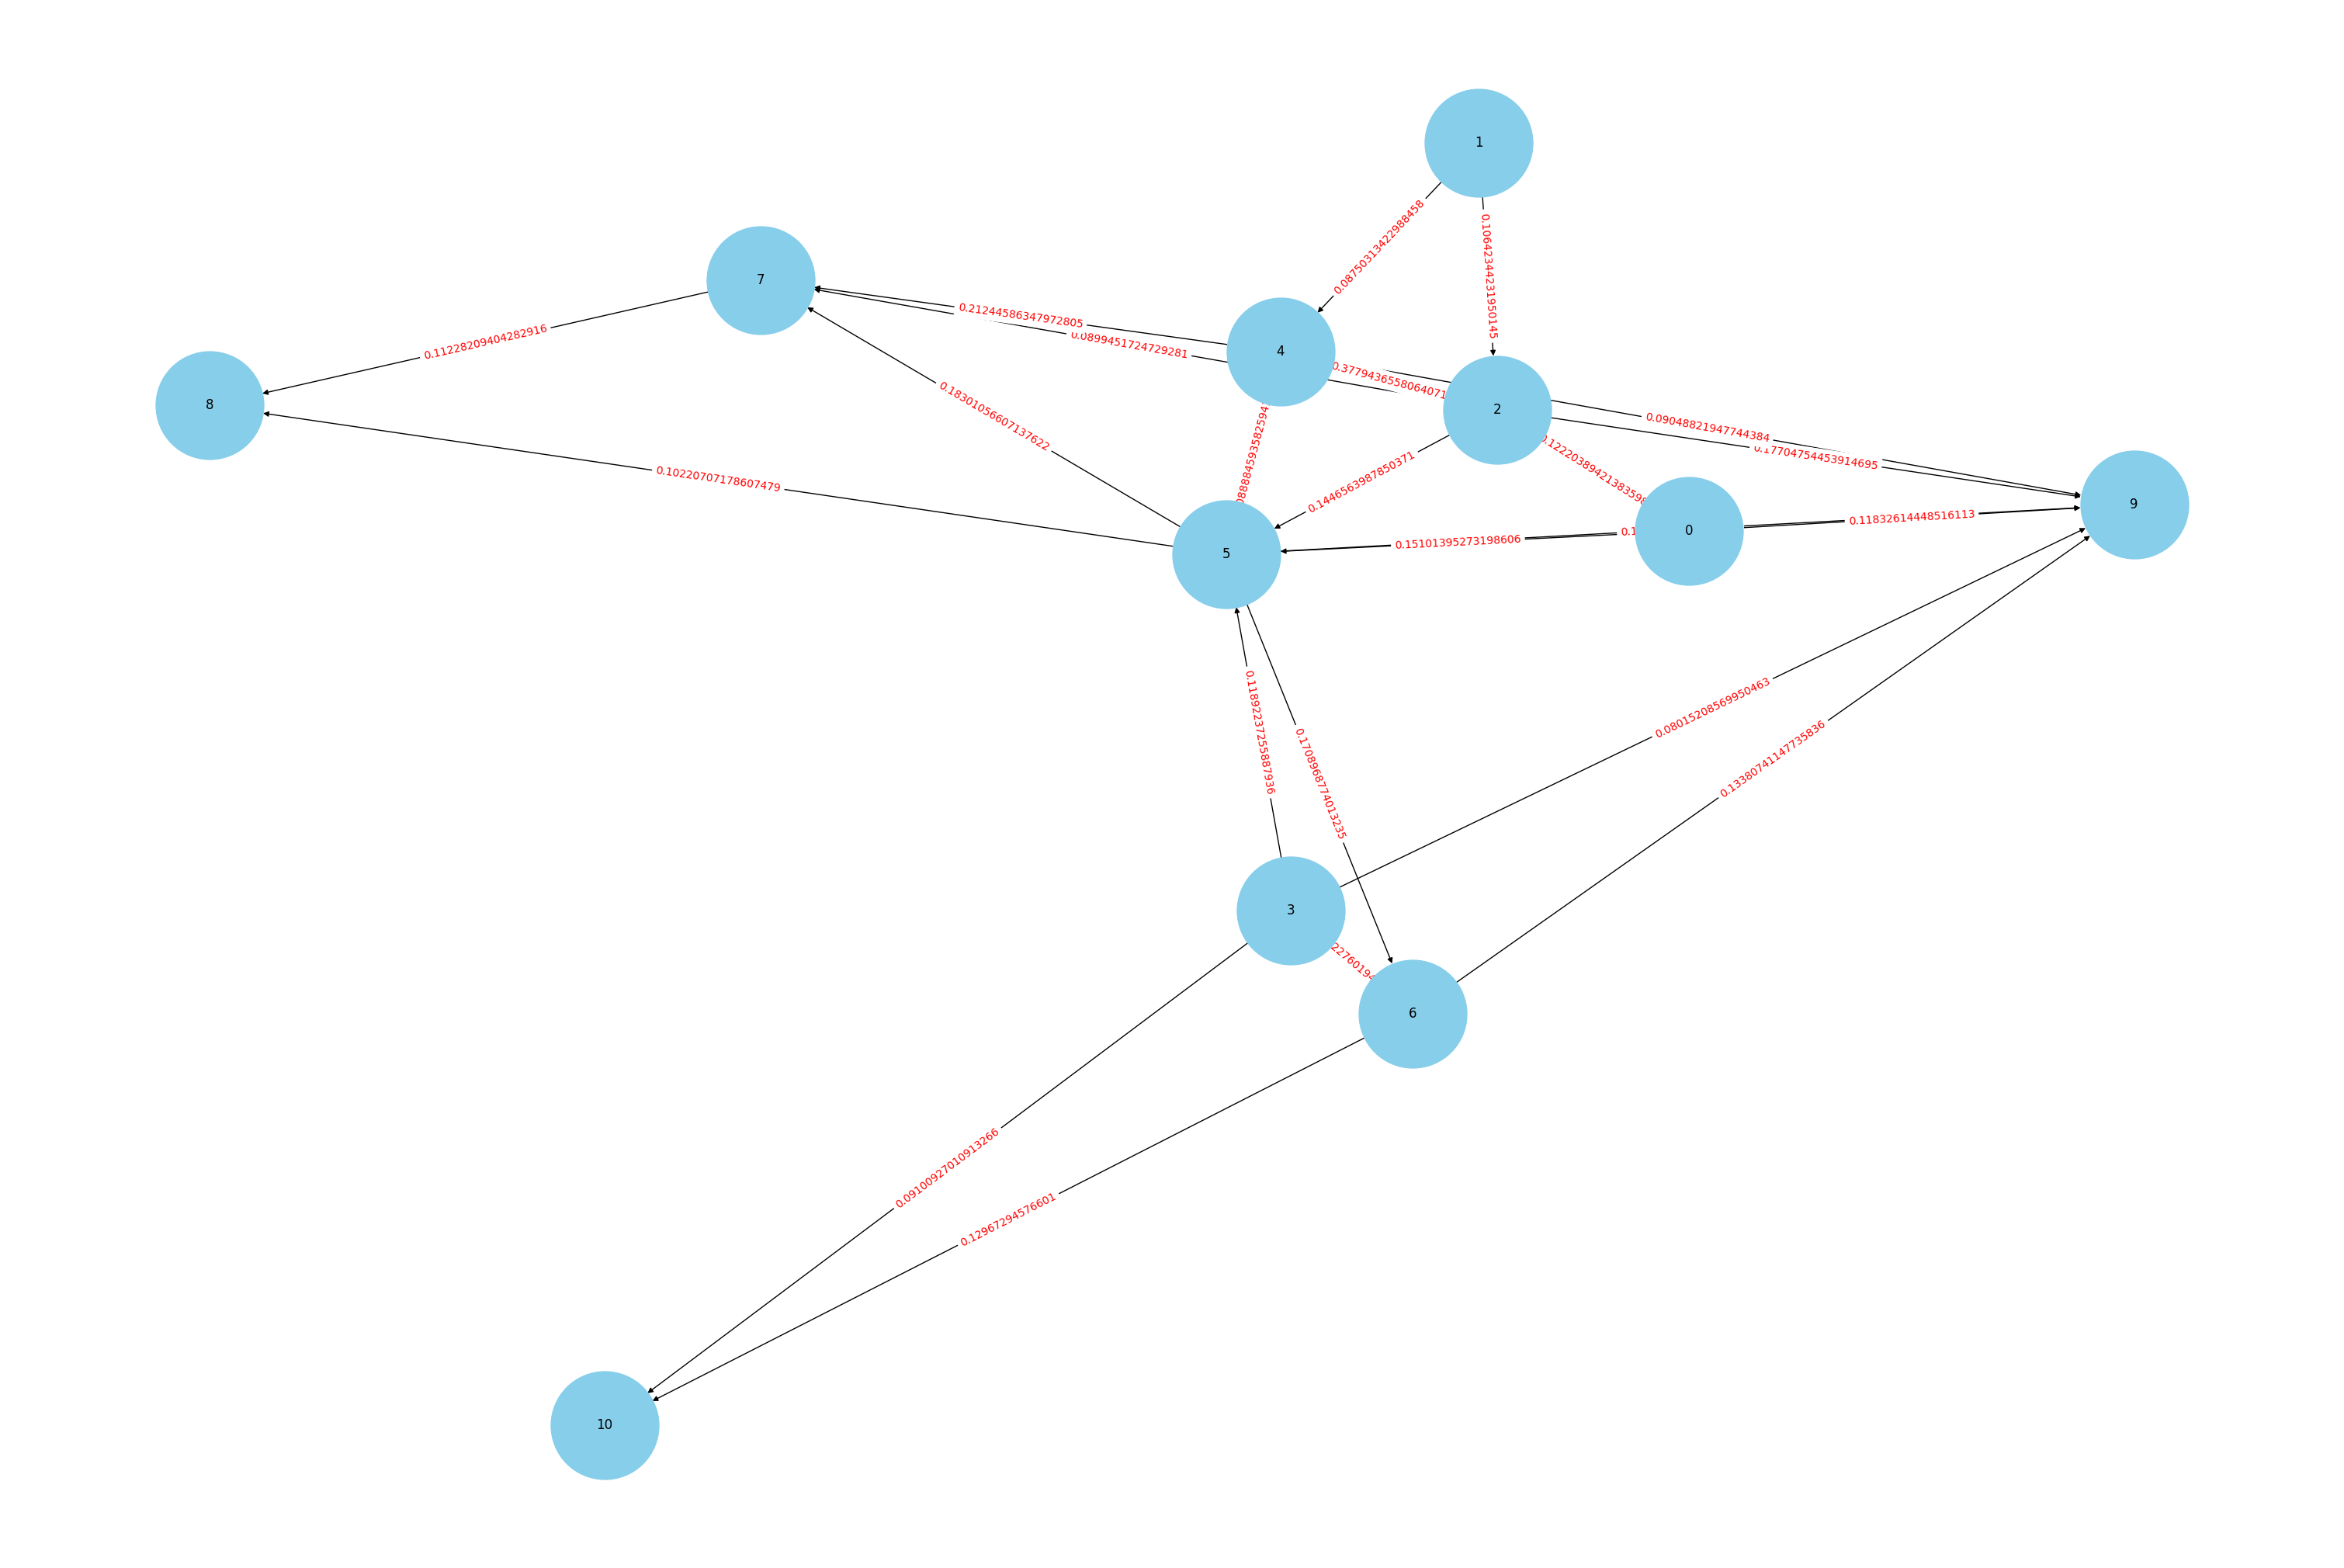



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.125
Closenes Centrality Node 5 = 0.625
Closenes Centrality Node 2 = 0.16666666666666666
Closenes Centrality Node 6 = 0.4
Closenes Centrality Node 7 = 0.765625
Closenes Centrality Node 8 = 0.28125
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 4 = 0.0


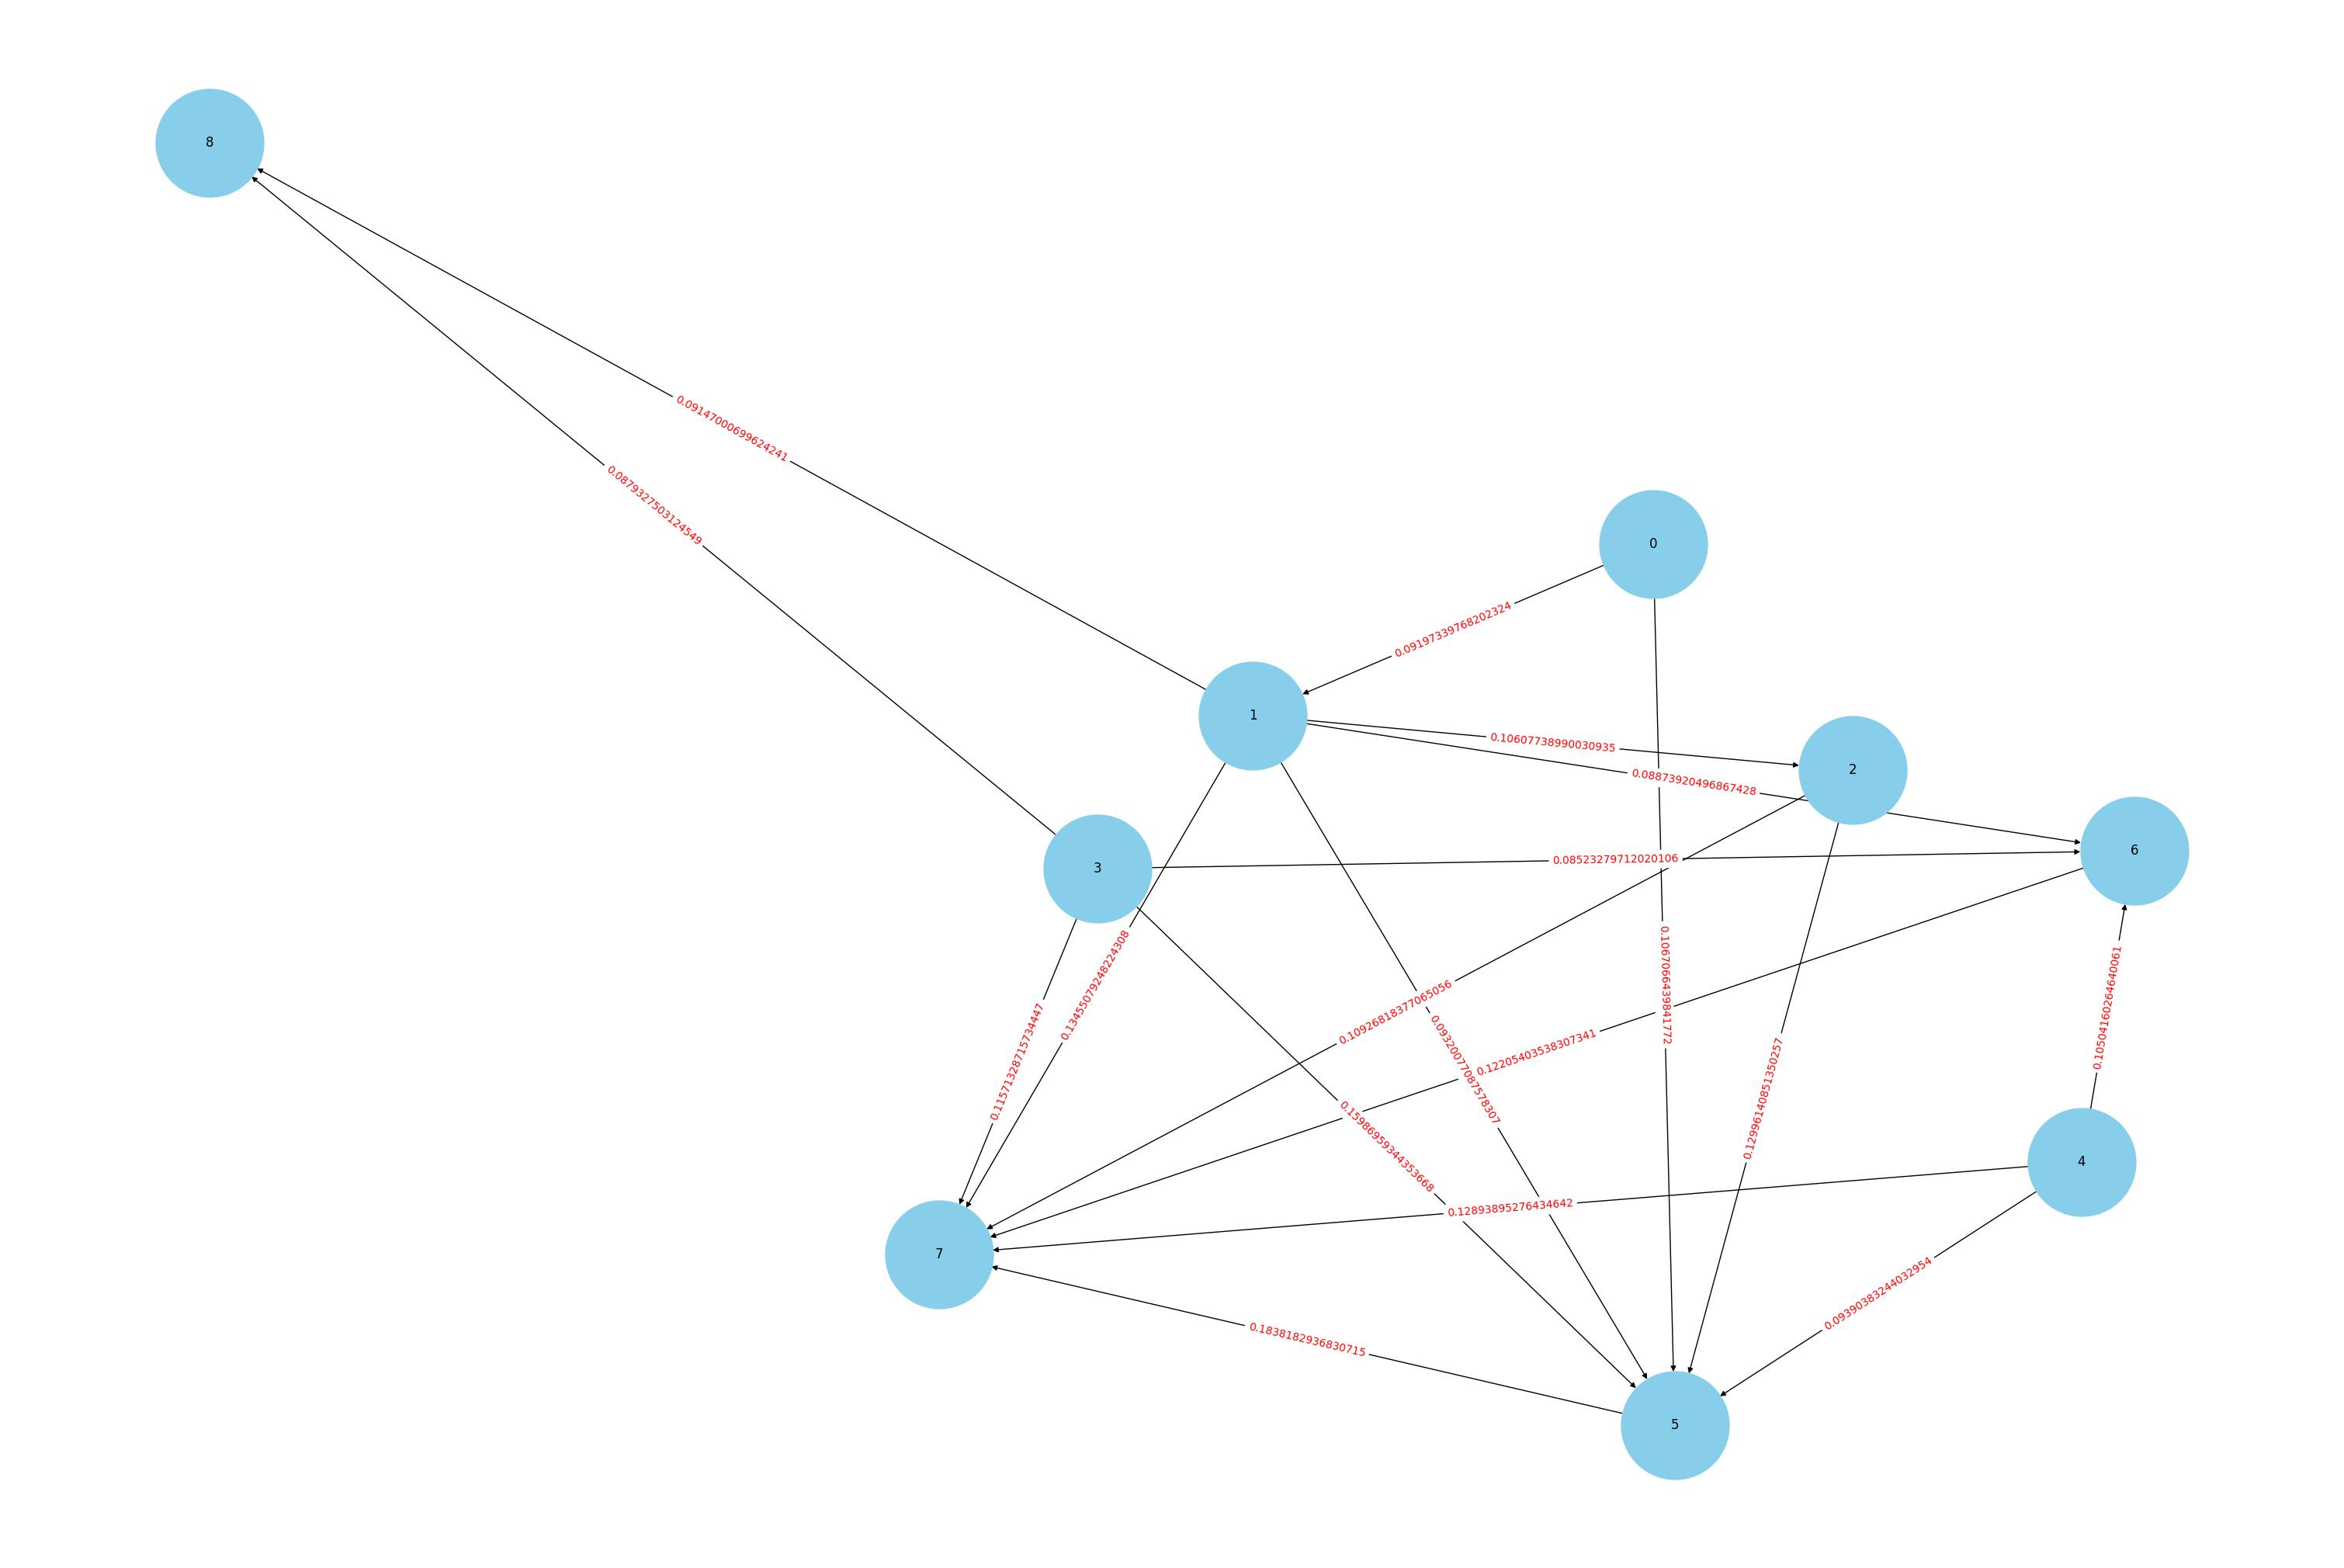



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 3 = 0.125
Closenes Centrality Node 6 = 0.2
Closenes Centrality Node 8 = 0.16666666666666666
Closenes Centrality Node 11 = 0.22321428571428573
Closenes Centrality Node 12 = 0.4444444444444444
Closenes Centrality Node 13 = 0.1736111111111111
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 4 = 0.140625
Closenes Centrality Node 16 = 0.2708333333333333
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 7 = 0.0625
Closenes Centrality Node 15 = 0.30000000000000004
Closenes Centrality Node 5 = 0.125
Closenes Centrality Node 10 = 0.21052631578947367
Closenes Centrality Node 14 = 0.328804347826087
Closenes Centrality Node 9 = 0.08333333333333333


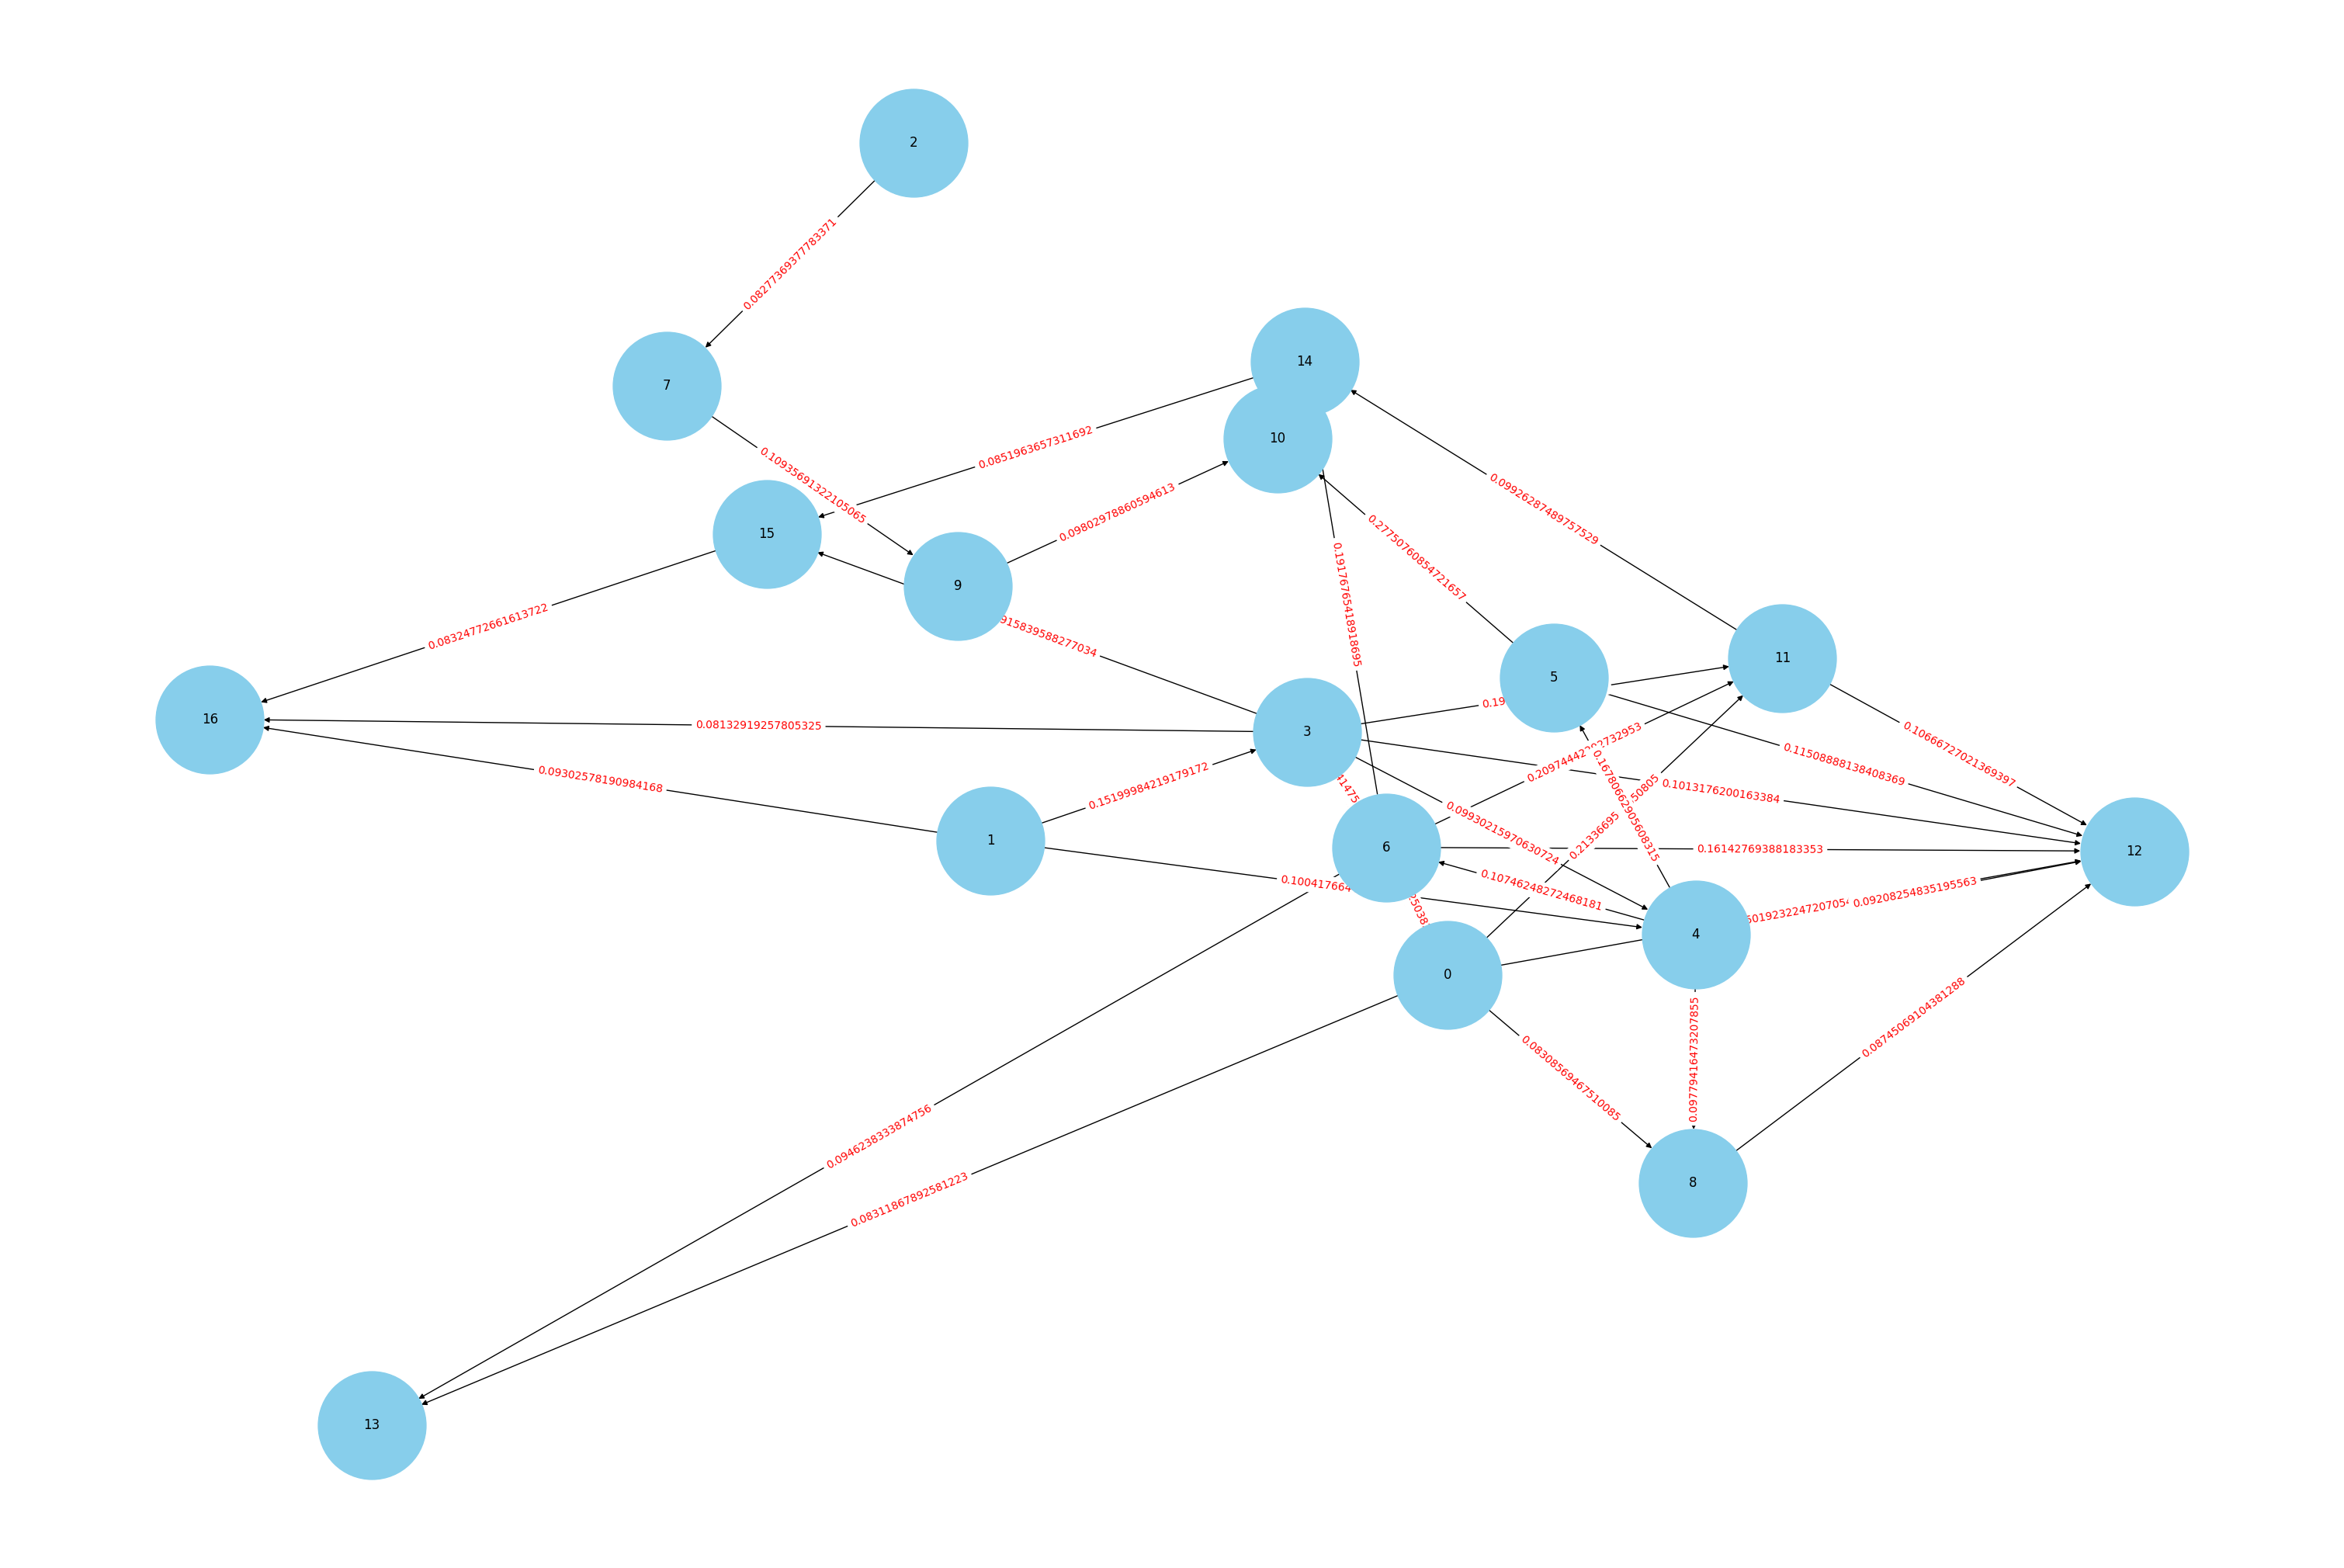

In [21]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

In [ ]:
# for i in range(len(graf_result)):
#   cc = nx.closeness_centrality(graf_result[i])
#   print(f'====== dokumen {i} ==========')
#   print(cc)
#   print('\n')
#   # for j in range

### Summary
Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.

In [22]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(data['tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [23]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [24]:
summary_result

['pabrik baterai ada dan otomotifnya akan berkaitan, tambahnya. memang indonesia sudah punya sumber mineral yang baik untuk komponen baterai dan pabriknya sudah ada rencan di sulawesi, jawa tengah, dan jawa barat, lanjut rachmat. sementara saat ini sudah ada beberapa rencana untuk pabrik baterai di indonesia. saat ini sudah ada beberapa puluh pabrik tapi yang memenuhi tkdn sekitar 15 persen, kata dia. ke depan pabrik baterai akan berakitan dengan pabrik otomotif itu sendiri. baca juga cara menjaga bodi mobil dari karat dan keropos  kami berikan bantuan pemerintah dan insentif fiskal yang memenuhi tkdn 40 persen. untuk produsen yang sudah memenuhinya silahkan mengajukan. bantuan diberikan hanya untuk produk kendaraan listrik yang mencapai tingkat kandungan dalam negeri tkdn minimum 40 persen. insentif untuk sepeda motor listrik yang diberikan senilai rp 7 juta, termasuk untuk konversi. insentif ditunjukkan ke satu juta motor dan 100.000 mobil listrik. memang belum maksimal tapi ini berk

In [25]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,data['Category']],axis=1)
dataSummary

Summary  Category
0    pabrik baterai ada dan otomotifnya akan berkai...  Otomotif
1    bicara soal elektrifikasi, mazda cx60 di indon...  Otomotif
2    baca juga manjakan konsumen, honda tambah laya...  Otomotif
3    kegiatan bakal berlangsung selama dua hari di ...  Otomotif
4    namun, untuk penumpang di baris belakang, jok ...  Otomotif
..                                                 ...       ...
760  salah satu klub arab saudi disebut juga berenc...    Sports
761  baca juga indonesia vs brunei trik sty jaga ke...    Sports
762  baca juga klasemen kualifikasi piala asia futs...    Sports
763  pada musim debutnya bersama real madrid, belli...    Sports
764  baca juga arti penting motogp mandalika 2023 b...    Sports

[765 rows x 2 columns]

### Save Data

In [26]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Category':data['Category'][i]
  })

In [28]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = 'data_summary_kompas.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Category']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_summary_kompas.csv


## Modeling Data Summary

## EDA (Explorasi Data Analysis)
Proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.

In [29]:
datasummary = pd.read_csv("data_summary_kompas.csv")
datasummary

Summary  Category
0    pabrik baterai ada dan otomotifnya akan berkai...  Otomotif
1    bicara soal elektrifikasi, mazda cx60 di indon...  Otomotif
2    baca juga manjakan konsumen, honda tambah laya...  Otomotif
3    kegiatan bakal berlangsung selama dua hari di ...  Otomotif
4    namun, untuk penumpang di baris belakang, jok ...  Otomotif
..                                                 ...       ...
760  salah satu klub arab saudi disebut juga berenc...    Sports
761  baca juga indonesia vs brunei trik sty jaga ke...    Sports
762  baca juga klasemen kualifikasi piala asia futs...    Sports
763  pada musim debutnya bersama real madrid, belli...    Sports
764  baca juga arti penting motogp mandalika 2023 b...    Sports

[765 rows x 2 columns]

In [30]:
datasummary.isna().sum()

Summary     0
Category    0
dtype: int64

In [31]:
datasummary.duplicated().sum()

0

### Cleaning

In [33]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama Summary untuk data baru yang dipunctuation
datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'Summary'
datasummary['summary_clean'] = datasummary['summary_clean'].str.replace('\d+', '', regex=True)
datasummary

<ipython-input-33-e9095bfa76de>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


Summary  Category  \
0    pabrik baterai ada dan otomotifnya akan berkai...  Otomotif   
1    bicara soal elektrifikasi, mazda cx60 di indon...  Otomotif   
2    baca juga manjakan konsumen, honda tambah laya...  Otomotif   
3    kegiatan bakal berlangsung selama dua hari di ...  Otomotif   
4    namun, untuk penumpang di baris belakang, jok ...  Otomotif   
..                                                 ...       ...   
760  salah satu klub arab saudi disebut juga berenc...    Sports   
761  baca juga indonesia vs brunei trik sty jaga ke...    Sports   
762  baca juga klasemen kualifikasi piala asia futs...    Sports   
763  pada musim debutnya bersama real madrid, belli...    Sports   
764  baca juga arti penting motogp mandalika 2023 b...    Sports   

                                         summary_clean  
0    pabrik baterai ada dan otomotifnya akan berkai...  
1    bicara soal elektrifikasi mazda cx di indonesi...  
2    baca juga manjakan konsumen honda tambah layan...  
3    kegiatan bakal berlangsung selama dua hari di ...  
4    namun untuk penumpang di baris belakang jok te...  
..                                                 ...  
760  salah satu klub arab saudi disebut juga berenc...  
761  baca juga indonesia vs brunei trik sty jaga ke...  
762  baca juga klasemen kualifikasi piala asia futs...  
763  pada musim debutnya bersama real madrid bellin...  
764  baca juga arti penting motogp mandalika  bagi ...  

[765 rows x 3 columns]

### Stopwords
Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_clean'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

datasummary

Summary  Category  \
0    pabrik baterai ada dan otomotifnya akan berkai...  Otomotif   
1    bicara soal elektrifikasi, mazda cx60 di indon...  Otomotif   
2    baca juga manjakan konsumen, honda tambah laya...  Otomotif   
3    kegiatan bakal berlangsung selama dua hari di ...  Otomotif   
4    namun, untuk penumpang di baris belakang, jok ...  Otomotif   
..                                                 ...       ...   
760  salah satu klub arab saudi disebut juga berenc...    Sports   
761  baca juga indonesia vs brunei trik sty jaga ke...    Sports   
762  baca juga klasemen kualifikasi piala asia futs...    Sports   
763  pada musim debutnya bersama real madrid, belli...    Sports   
764  baca juga arti penting motogp mandalika 2023 b...    Sports   

                                         summary_clean  \
0    pabrik baterai ada dan otomotifnya akan berkai...   
1    bicara soal elektrifikasi mazda cx di indonesi...   
2    baca juga manjakan konsumen honda tambah layan...   
3    kegiatan bakal berlangsung selama dua hari di ...   
4    namun untuk penumpang di baris belakang jok te...   
..                                                 ...   
760  salah satu klub arab saudi disebut juga berenc...   
761  baca juga indonesia vs brunei trik sty jaga ke...   
762  baca juga klasemen kualifikasi piala asia futs...   
763  pada musim debutnya bersama real madrid bellin...   
764  baca juga arti penting motogp mandalika  bagi ...   

                                     summary_stopwords  
0    pabrik baterai ada dan otomotifnya akan berkai...  
1    bicara soal elektrifikasi mazda cx di indonesi...  
2    baca juga manjakan konsumen honda tambah layan...  
3    kegiatan bakal berlangsung selama dua hari di ...  
4    namun untuk penumpang di baris belakang jok te...  
..                                                 ...  
760  salah satu klub arab saudi disebut juga berenc...  
761  baca juga indonesia vs brunei trik sty jaga ke...  
762  baca juga klasemen kualifikasi piala asia futs...  
763  pada musim debutnya bersama real madrid bellin...  
764  baca juga arti penting motogp mandalika  bagi ...  

[765 rows x 4 columns]

### Tokenizing
Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.

In [36]:
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)
datasummary

Summary  Category  \
0    pabrik baterai ada dan otomotifnya akan berkai...  Otomotif   
1    bicara soal elektrifikasi, mazda cx60 di indon...  Otomotif   
2    baca juga manjakan konsumen, honda tambah laya...  Otomotif   
3    kegiatan bakal berlangsung selama dua hari di ...  Otomotif   
4    namun, untuk penumpang di baris belakang, jok ...  Otomotif   
..                                                 ...       ...   
760  salah satu klub arab saudi disebut juga berenc...    Sports   
761  baca juga indonesia vs brunei trik sty jaga ke...    Sports   
762  baca juga klasemen kualifikasi piala asia futs...    Sports   
763  pada musim debutnya bersama real madrid, belli...    Sports   
764  baca juga arti penting motogp mandalika 2023 b...    Sports   

                                         summary_clean  \
0    pabrik baterai ada dan otomotifnya akan berkai...   
1    bicara soal elektrifikasi mazda cx di indonesi...   
2    baca juga manjakan konsumen honda tambah layan...   
3    kegiatan bakal berlangsung selama dua hari di ...   
4    namun untuk penumpang di baris belakang jok te...   
..                                                 ...   
760  salah satu klub arab saudi disebut juga berenc...   
761  baca juga indonesia vs brunei trik sty jaga ke...   
762  baca juga klasemen kualifikasi piala asia futs...   
763  pada musim debutnya bersama real madrid bellin...   
764  baca juga arti penting motogp mandalika  bagi ...   

                                     summary_stopwords  \
0    pabrik baterai ada dan otomotifnya akan berkai...   
1    bicara soal elektrifikasi mazda cx di indonesi...   
2    baca juga manjakan konsumen honda tambah layan...   
3    kegiatan bakal berlangsung selama dua hari di ...   
4    namun untuk penumpang di baris belakang jok te...   
..                                                 ...   
760  salah satu klub arab saudi disebut juga berenc...   
761  baca juga indonesia vs brunei trik sty jaga ke...   
762  baca juga klasemen kualifikasi piala asia futs...   
763  pada musim debutnya bersama real madrid bellin...   
764  baca juga arti penting motogp mandalika  bagi ...   

                                        summary_tokens  
0    [pabrik, baterai, ada, dan, otomotifnya, akan,...  
1    [bicara, soal, elektrifikasi, mazda, cx, di, i...  
2    [baca, juga, manjakan, konsumen, honda, tambah...  
3    [kegiatan, bakal, berlangsung, selama, dua, ha...  
4    [namun, untuk, penumpang, di, baris, belakang,...  
..                                                 ...  
760  [salah, satu, klub, arab, saudi, disebut, juga...  
761  [baca, juga, indonesia, vs, brunei, trik, sty,...  
762  [baca, juga, klasemen, kualifikasi, piala, asi...  
763  [pada, musim, debutnya, bersama, real, madrid,...  
764  [baca, juga, arti, penting, motogp, mandalika,...  

[765 rows x 5 columns]

In [37]:
# merubah posisi kolom
datasummary = datasummary[['Summary', 'summary_clean', 'summary_stopwords',
            'summary_tokens','Category']]

# Merge
Merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh

In [38]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-38-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


### TF IDF
metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df = pd.concat([datasummary['Summary'],tfidf_df,datasummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
tfidf_df

Summary    0    1    2    3  \
0    pabrik baterai ada dan otomotifnya akan berkai...  0.0  0.0  0.0  0.0   
1    bicara soal elektrifikasi, mazda cx60 di indon...  0.0  0.0  0.0  0.0   
2    baca juga manjakan konsumen, honda tambah laya...  0.0  0.0  0.0  0.0   
3    kegiatan bakal berlangsung selama dua hari di ...  0.0  0.0  0.0  0.0   
4    namun, untuk penumpang di baris belakang, jok ...  0.0  0.0  0.0  0.0   
..                                                 ...  ...  ...  ...  ...   
760  salah satu klub arab saudi disebut juga berenc...  0.0  0.0  0.0  0.0   
761  baca juga indonesia vs brunei trik sty jaga ke...  0.0  0.0  0.0  0.0   
762  baca juga klasemen kualifikasi piala asia futs...  0.0  0.0  0.0  0.0   
763  pada musim debutnya bersama real madrid, belli...  0.0  0.0  0.0  0.0   
764  baca juga arti penting motogp mandalika 2023 b...  0.0  0.0  0.0  0.0   

       4    5    6    7    8  ...  14484  14485  14486  14487  14488  14489  \
0    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
..   ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...   
760  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
761  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
762  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
763  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
764  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

     14490  14491  14492  Category  
0      0.0    0.0    0.0  Otomotif  
1      0.0    0.0    0.0  Otomotif  
2      0.0    0.0    0.0  Otomotif  
3      0.0    0.0    0.0  Otomotif  
4      0.0    0.0    0.0  Otomotif  
..     ...    ...    ...       ...  
760    0.0    0.0    0.0    Sports  
761    0.0    0.0    0.0    Sports  
762    0.0    0.0    0.0    Sports  
763    0.0    0.0    0.0    Sports  
764    0.0    0.0    0.0    Sports  

[765 rows x 14495 columns]

### Modeling

In [40]:
# import library
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = tfidf_df["Category"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)


### Naive Bayes

In [41]:
# Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [42]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_tfidf_train, y_tfidf_train)

y_pred = naive_bayes.predict(X_tfidf_test)

accuracy_naiveBayes = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.9738562091503268


### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.9803921568627451


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.9803921568627451


### Visualisasi

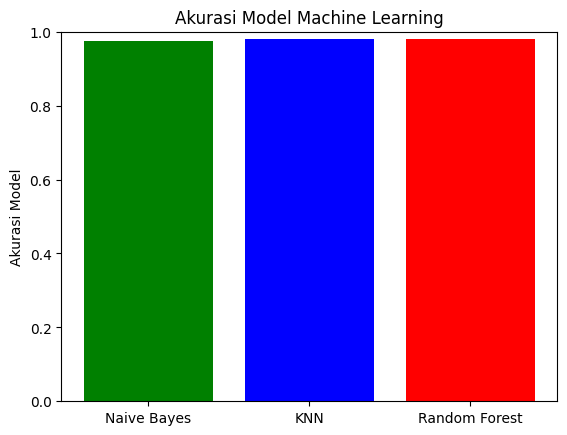

In [47]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()